In [27]:
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import layers, models
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil


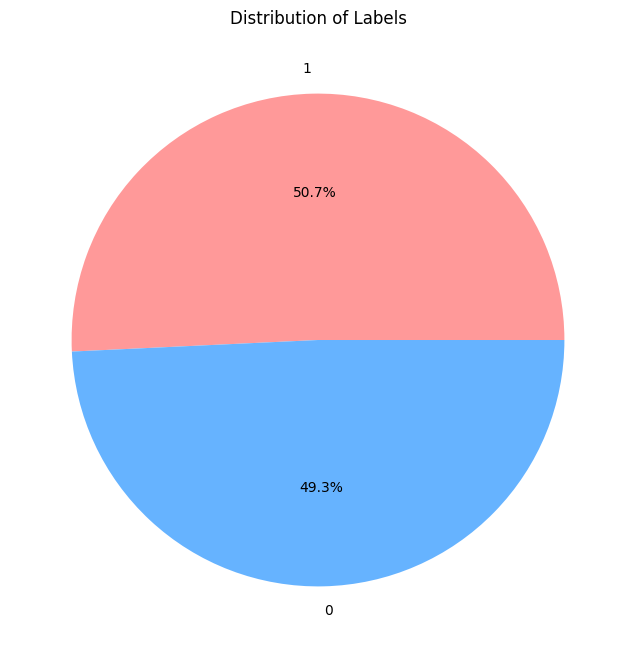

In [28]:
# 讀取 CSV 文件
df = pd.read_csv('/Volumes/NO NAME/正射影像/第1作業區/桃園資料標注拷貝.csv')

# 統計 `label` 欄位中 `0` 和 `1` 的個數
label_counts = df['label'].value_counts()

# 繪製圓餅圖
plt.figure(figsize=(8, 8))  # 設定圖像大小
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Labels')
plt.show()

In [29]:
# 讀取標註 CSV 文件
df = pd.read_csv('/Volumes/NO NAME/正射影像/第1作業區/桃園資料標注拷貝.csv')

# 分割數據
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 保存分割後的數據集
train_df.to_csv('/Users/yulin/Desktop/專題程式/桃園train.csv', index=False)
test_df.to_csv('/Users/yulin/Desktop/專題程式/桃園test.csv', index=False)

In [30]:
# 設定圖片資料夾路徑
source_folder = '/Volumes/NO NAME/正射影像/第1作業區/small'
train_folder = '/Users/yulin/Desktop/專題程式/桃園train'
test_folder = '/Users/yulin/Desktop/專題程式/桃園test'

# 讀取標註 CSV 文件
df = pd.read_csv('/Volumes/NO NAME/正射影像/第1作業區/桃園資料標注拷貝.csv')

# 讀取分割後的 CSV 文件
train_df = pd.read_csv('/Users/yulin/Desktop/專題程式/桃園train.csv')
test_df = pd.read_csv('/Users/yulin/Desktop/專題程式/桃園test.csv')

# 創建目標資料夾
os.makedirs(os.path.join(train_folder, 'y'), exist_ok=True)
os.makedirs(os.path.join(train_folder, 'n'), exist_ok=True)
os.makedirs(os.path.join(test_folder, 'y'), exist_ok=True)
os.makedirs(os.path.join(test_folder, 'n'), exist_ok=True)

def move_images(df, target_folder):
    for _, row in df.iterrows():
        img_name = row['filename']
        label = 'y' if row['label'] == 1 else 'n'
        src_path = os.path.join(source_folder, img_name)
        dest_path = os.path.join(target_folder, label, img_name)
        
        # 移動圖像
        if os.path.exists(src_path):
            shutil.copy(src_path, dest_path)

# 移動訓練集圖像
move_images(train_df, train_folder)

# 移動測試集圖像
move_images(test_df, test_folder)

print("Image splitting and moving completed.")


Image splitting and moving completed.


In [31]:
# 創建訓練數據生成器
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# 創建測試數據生成器
test_datagen = ImageDataGenerator(rescale=1./255)

# 讀取數據
train_generator = train_datagen.flow_from_directory(
    '/Users/yulin/Desktop/專題程式/桃園train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/Users/yulin/Desktop/專題程式/桃園test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)


Found 1445 images belonging to 2 classes.
Found 362 images belonging to 2 classes.


In [83]:
# 創建 CNN 模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])



/Users/yulin/Desktop/專題程式/projvenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# 打印模型架構
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,086,913 (49.92 MB)

 Trainable params: 13,086,913 (49.92 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# 編譯模型
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# 訓練模型
history = model.fit(
    train_generator,
    steps_per_epoch=45,  # 根據你的數據集大小調整 1445/32=45
    epochs=10,
    validation_data=test_generator,
    validation_steps=11  # 根據你的數據集大小調整 362/32=11
)

Epoch 1/10


/Users/yulin/Desktop/專題程式/projvenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.5217 - loss: 0.6894 - val_accuracy: 0.5455 - val_loss: 0.6543
Epoch 2/10
 1/45 ━━━━━━━━━━━━━━━━━━━━ 1:19 2s/step - accuracy: 0.5938 - loss: 0.6596

2024-08-10 15:31:23.604695: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.12/3.12.3/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5938 - loss: 0.6596 - val_accuracy: 0.4000 - val_loss: 0.7323
Epoch 3/10


2024-08-10 15:31:23.840713: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.6389 - loss: 0.6429 - val_accuracy: 0.7273 - val_loss: 0.5339
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6562 - loss: 0.6046 - val_accuracy: 0.9000 - val_loss: 0.5352
Epoch 5/10


2024-08-10 15:33:15.950335: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7513 - loss: 0.5210 - val_accuracy: 0.7670 - val_loss: 0.4612
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7188 - loss: 0.4750 - val_accuracy: 0.7000 - val_loss: 0.4889
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7962 - loss: 0.4452 - val_accuracy: 0.6761 - val_loss: 0.6455
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9062 - loss: 0.2968 - val_accuracy: 0.8000 - val_loss: 0.4287
Epoch 9/10


2024-08-10 15:36:34.069782: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.8197 - loss: 0.3812 - val_accuracy: 0.6477 - val_loss: 0.8833
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7812 - loss: 0.3626 - val_accuracy: 0.7000 - val_loss: 0.6276


In [36]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 492ms/step - accuracy: 0.7347 - loss: 0.5812
Test accuracy: 0.7209944725036621


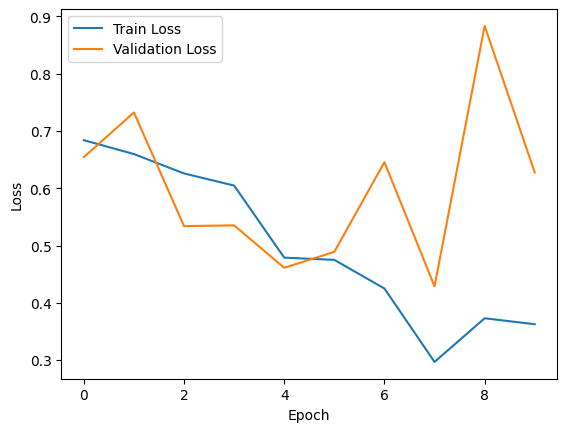

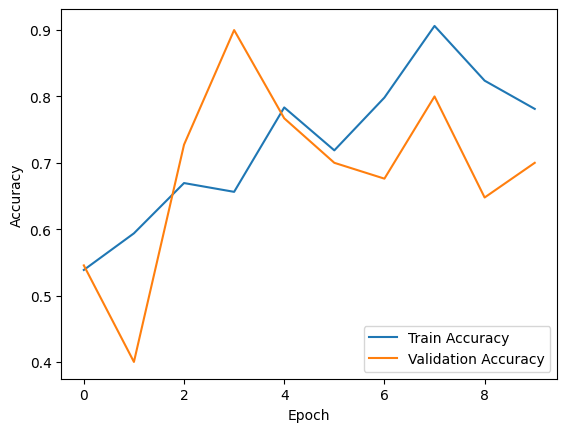

In [37]:
# 繪製損失曲線
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 繪製準確率曲線
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [38]:
# 保存模型
model.save('/Users/yulin/Desktop/專題程式/model.h5')

In [39]:
# 重新加载模型
loaded_model = tf.keras.models.load_model('/Users/yulin/Desktop/專題程式/model.h5')

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 获取真实标签
true_classes = test_generator.classes
# 获取类别名称
class_labels = list(test_generator.class_indices.keys())
# 获取预测标签
y_pred = loaded_model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int).flatten()
# 计算混淆矩阵
cm = confusion_matrix(true_classes, y_pred)


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 491ms/step


In [54]:
#顯示預測標籤與真實標籤
print("預測标签:", y_pred)
print("真实标签:", true_classes)

預測标签: [1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0
 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0
 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0
 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1
 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1
 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1]
真实标签: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0

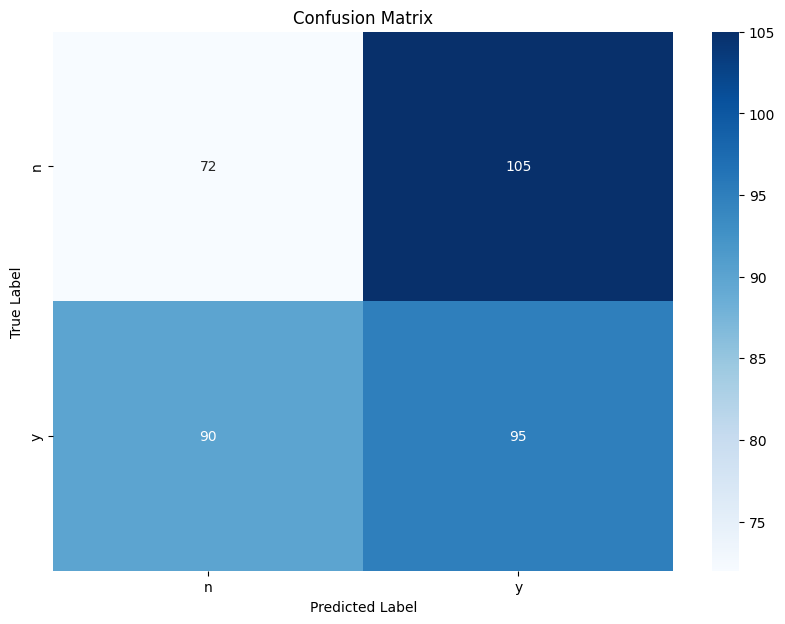

In [55]:
# 绘制混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
# 类别名称
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
